In [19]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read data
#loc = r'C:\Program Files\Python36\Scripts\Coursera_ML\ex2\ex2data1.txt'
#data = pd.read_csv(loc, sep = ',', header = None)
#data.shape

(100, 3)

In [99]:
loc = 'https://raw.githubusercontent.com/chenyuw1/coursera-ml-hw/master/hw2/ex2data1.txt'
data = pd.read_csv(loc, sep = ',', header = None)
data.shape

(100, 3)

In [100]:
data.columns = ['exam1', 'exam2', 'admission']
data.head()

,exam1,exam2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


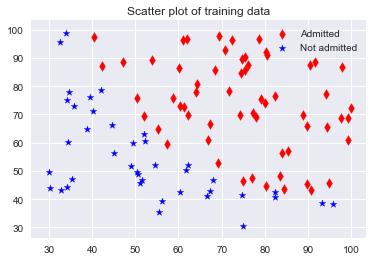

In [22]:
# plot
# with matplotlib
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Scatter plot of training data')
plot1 = ax.scatter(data[data.admission == 1].exam1, data[data.admission == 1].exam2, marker = 'd', c = 'red',
                  label = 'Admitted')
plot2 = ax.scatter(data[data.admission == 0].exam1, data[data.admission == 0].exam2, marker = '*', c = 'blue',
                  label = 'Not admitted')
ax.legend()
fig.canvas.draw()

In [43]:
# warmup: sigmoid function
# for one element
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [44]:
# sigmoid for vector/matrix
sigmd = np.vectorize(sigmoid)

In [72]:
# for dataframe or series
# df.applymap(sigmoid)
# series.apply(sigmoid)

In [103]:
# add x0 to data
x0 = [1] * len(data)
df0 = pd.DataFrame(x0)
data = pd.concat([df0, data], axis = 1)
data.columns = ['intercept', 'exam1', 'exam2', 'admission']
data.head()

,intercept,exam1,exam2,admission
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [110]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [141]:
# cost function
def costFunc(theta, x, y):
    m = len(y)
    hx = sigmd(np.dot(x, theta))
    
    # cost function for logistic reg
    j = (- y.T * np.log(hx) - (1 - y.T) * np.log(1 - hx)).sum() / m
    
    # gradient
    grad = np.dot((hx - y), x) / m
    
    return j, grad

In [142]:
# test
j1, grad1 = costFunc([0, 0, 0], x, y)
j1, grad1

(0.6931471805599458, array([ -0.1       , -12.00921659, -11.26284221]))

In [143]:
# test
j2, grad2 = costFunc([-24, 0.2, 0.2], x, y)
j2, grad2

(0.218330193826598, array([ 0.04290299,  2.56623412,  2.64679737]))

In [136]:
# np.dot((hx - y), x) already include the sum calculation for rows
# see example:
# t = [0, 0, 0]
# hx = sigmd(np.dot(x, t))
# (hx - y).dot(x)

In [139]:
# optimize theta using gradient descent
def gradientDescent(x, y, theta, alpha, num_iters):
    m = len(y)
    j_hist = [0] * number_iters
    
    for i in range(num_iters):
        j[i], grad = costFunc(x, y, theta)
        theta -= alpha * grad
    
    return theta

In [140]:
from scipy.optimize import fmin_bfgs

In [188]:
def init_theta(x):
    #x_mx = x.values
    #theta = np.zeros(x_mx.shape[1])
    #return theta.flatten()
    n = x.shape[1]
    return [0] * n

In [201]:
def cost_opt(theta, x, y):
    m = len(y)
    hx = sigmd(np.dot(x, theta))
    
    # cost function for logistic reg
    if (hx.all() != 0) and ((1 - hx).all() != 0):
        j = (- y.T * np.log(hx) - (1 - y.T) * np.log(1 - hx)).sum() / m
    else: j = 100000
    
    return j

In [184]:
def grad(theta, x, y):
    m = len(y)
    hx = sigmd(np.dot(x, theta))

    # gradient
    grad = np.dot((hx - y), x) / m
    
    return grad

In [227]:
# optimize theta using fmin_bfgs
theta = init_theta(x)
myargs = (x, y)
theta_opt = fmin_bfgs(cost_opt, theta, args = myargs, fprime = grad)
theta_opt

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 28
         Gradient evaluations: 28


array([-25.16133401,   0.20623172,   0.2014716 ])

In [230]:
# evaluating logistic regression
def pred(theta, x_new):
    x_df = pd.DataFrame(x_new).T
    x0 = [1] * len(x_df)
    df0 = pd.DataFrame(x0)
    df = pd.concat([df0, x_df], axis = 1)
    
    values = sigmd(np.dot(df, theta))
    
    cutoff = lambda x: 1 if x > 0.5 else 0
    vcutoff = np.vectorize(cutoff)
    pred = vcutoff(values)
    
    return pred

In [231]:
# prediction test
x_new = [45, 85]
pred(theta_opt, x_new)

array([1])

In [ ]:
# plot decision boundary

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Scatter plot of training data')
plot1 = ax.scatter(data[data.admission == 1].exam1, data[data.admission == 1].exam2, marker = 'd', c = 'red',
                  label = 'Admitted')
plot2 = ax.scatter(data[data.admission == 0].exam1, data[data.admission == 0].exam2, marker = '*', c = 'blue',
                  label = 'Not admitted')
plot3 = ax.plot(x.exam1, x.exam2 )
ax.legend()
fig.canvas.draw()